In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
import numba

In [2]:
class Datagen:
    def __init__(self,dim,mod,means,stddev,num_points):
        self.dim = dim
        self.mod = mod
        self.means = means
        self.stddev = stddev
        self.num_points = num_points
        self.ids = np.arange(1,self.mod*self.num_points + 1,1)
    
    def reshape_means(self):
        self.means = np.array(self.means).reshape(self.mod,self.dim)
    
    def reshape_stddev(self):
        self.stddev = np.array(self.stddev).reshape(self.mod,self.dim)

    def generate_gaussian(self):        
        pointsarr = []
        for row in range(self.mod):
            pointsarr.append(np.random.multivariate_normal(self.means[row],np.diag(self.stddev[row]),self.num_points))
        pointsarr = np.concatenate(pointsarr)
        return pointsarr  
    
    def totensor(self,numpyobj):
        return torch.tensor(numpyobj)
    
    def standardize(self,arr):        
        arr[:,0] = (arr[:,0]-torch.min(arr[:,0]))/(torch.max(arr[:,0]) - torch.min(arr[:,0]))
        arr[:,1] = (arr[:,1]-torch.min(arr[:,1]))/(torch.max(arr[:,1]) - torch.min(arr[:,1]))
        return arr

In [5]:
dim = 2
mod = 3
means = [20,20,40,40,80,80]
stddev = [1,1,9,9,25,25]
points = 1000

In [122]:
d_obj = Datagen(dim,mod,means,stddev,points)
d_obj.reshape_means()
d_obj.reshape_stddev()
pointsarr = d_obj.totensor(d_obj.generate_gaussian())

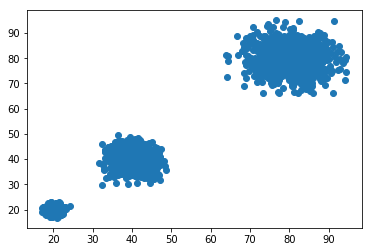

In [123]:
plt.scatter(pointsarr[:,0],pointsarr[:,1])

In [124]:
pointsarr = d_obj.standardize(pointsarr)

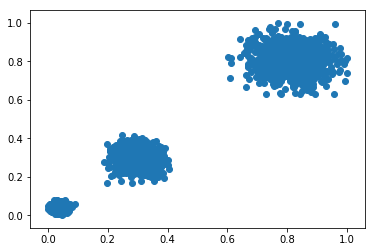

In [125]:
plt.scatter(pointsarr[:,0],pointsarr[:,1])

In [126]:
pointsarr = np.c_[pointsarr,0.25*pointsarr[:,0] + 0.75*pointsarr[:,1]].astype(np.float32)

In [127]:
pointsarr

array([[0.03681288, 0.03769518, 0.03747461],
       [0.05239159, 0.03334419, 0.03810604],
       [0.01840298, 0.02825091, 0.02578893],
       ...,
       [0.76284033, 0.81155723, 0.799378  ],
       [0.86398256, 0.7959673 , 0.8129711 ],
       [0.8536513 , 0.6816205 , 0.72462815]], dtype=float32)

In [128]:
for ind,data in enumerate(pointsarr):
    torch.save(pointsarr[ind], 'data/' + str(ind+1) + '.pt')

In [114]:
pointsarr[:,0:2].shape

(3000, 2)

In [117]:
pointsarr[0].astype(np.float32).dtype

dtype('float32')

# Test Dataset

In [6]:
points_test = 200

In [9]:
testdata = Datagen(dim,mod,means,stddev,points_test)
testdata.reshape_means()
testdata.reshape_stddev()
testarray = testdata.totensor(testdata.generate_gaussian())

In [10]:
testarray = testdata.standardize(testarray)

In [13]:
testarray = np.c_[testarray,0.25*testarray[:,0] + 0.75*testarray[:,1]].astype(np.float32)

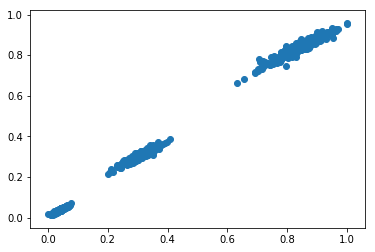

In [16]:
plt.scatter(testarray[:,1],testarray[:,2])

In [17]:
for ind,data in enumerate(testarray):
    torch.save(testarray[ind], 'testdata/' + str(ind+1) + '.pt')